## Student Information

- Name: Drashti Mehta
- Student ID: 801262877
- Assignment: Individual Assignment 3
- Submission date: November 15th, 2022
- Title: Comparative analysis of supervised machine learning methods for prediction of Breast Cancer
- Method used: Multiple methods (SVM dominated)

# Reference Paper and Dataset Information:

- Reference Paper Title: Prediction of Breast Cancer using SVM.
- Reference Paper Citation: Agarap, A. F. M. (2018, February). On breast cancer detection: an application of machine learning algorithms on the wisconsin diagnostic dataset. In Proceedings of the 2nd international conference on machine learning and soft computing (pp. 5-9).
- Reference Paper DOI: 10.1371/journal.pcbi.1005995 
- Reference Paper Link with coding: https://www.kaggle.com/code/lailaelmahmoudi123/predictions-of-breast-cancer-using-svm
- Dataset link: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download

- Other References:
- 1. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
- 2. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
- 3. https://seaborn.pydata.org/
- 4. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- 5. https://seaborn.pydata.org/generated/seaborn.heatmap.html

# CODE:

In [ ]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Pre-modeling stuff
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Modeling stuff
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
# importing the csv data in form of a dataframe 
from google.colab import drive
drive.mount('/drive')

df = pd.read_csv("/drive/My Drive/ML/Data/BreastCancer.csv")
df.head()

Mounted at /drive


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Attribute Information of the dataset:

1) ID number

2) Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

- a) radius (mean of distances from center to points on the perimeter)
- b) texture (standard deviation of gray-scale values)
- c) perimeter
- d) area
- e) smoothness (local variation in radius lengths)
- f) compactness (perimeter^2 / area - 1.0)
- g) concavity (severity of concave portions of the contour)
- h) concave points (number of concave portions of the contour)
- i) symmetry
- j) fractal dimension ("coastline approximation" - 1)

Check the target variable:

Malignant = 1 (indicates prescence of cancer cells)

Benign = 0 (indicates abscence)

In [ ]:
# check the missing values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
# remove the id and unnamed column
df= df.drop(['Unnamed: 32','id'],axis=1)

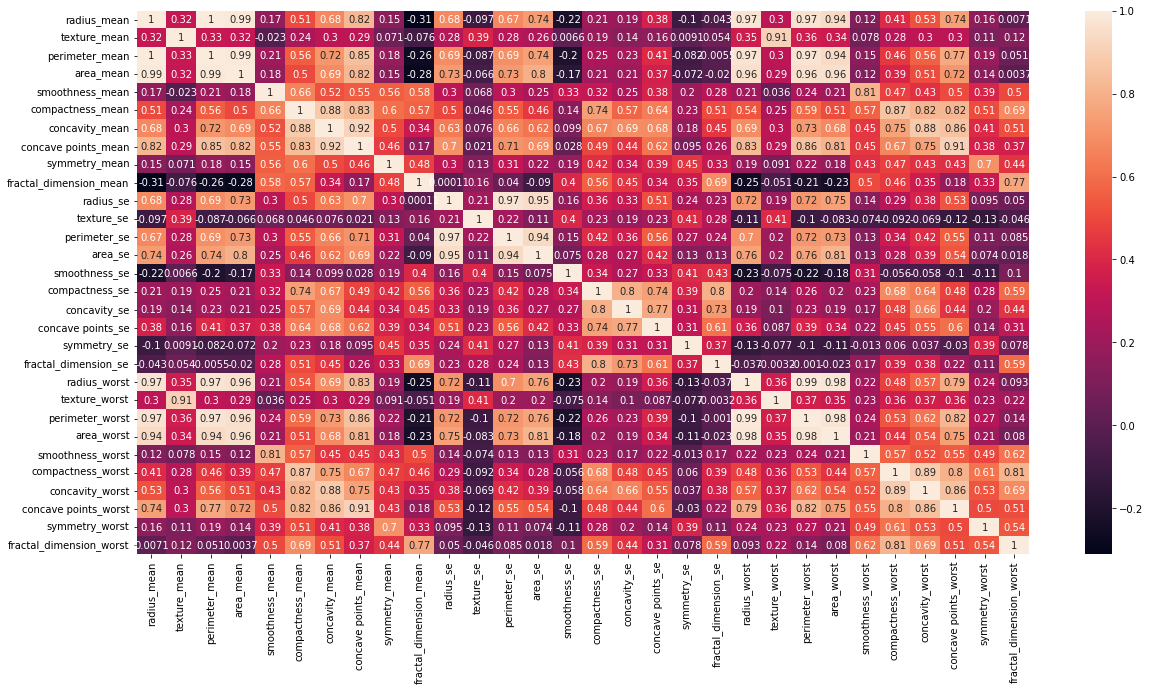

In [ ]:
# let's check the correlation:
# we use the heatmap function from sns here and .corr() for correlation

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.ioff()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


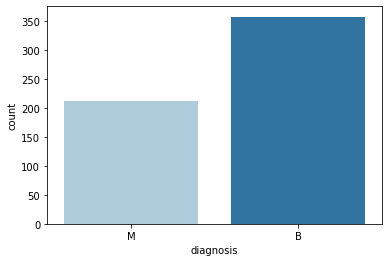

In [ ]:
# Target variable and understanding the malignant and benign cancer rate

sns.countplot(df['diagnosis'],palette='Paired')

## Now we wanna prepare the dataset for modeling:

In [ ]:
# separatign independent and dependent variables

X = df.drop('diagnosis',axis=1).values
y = df['diagnosis'].values

In [ ]:
# splitting the dataset

random_state = 42
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=random_state)

In [ ]:
# feature scaling. Here, we fit the scaling

sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test= sc.transform(x_test)

## Modeling:

Here, we want to compare modeling methods 
and check which work best for this type of cases

In [ ]:
# Logistic regression:

logreg= LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

In [ ]:
# Random Forest Classifier:

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
# Decision Tree Classifier:

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [ ]:
# KNeighbors Classifier:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [ ]:
# Support Vector classifier

svc = SVC(probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

In [ ]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

In [ ]:
# comparing the accuracy of the models:

from sklearn.metrics import accuracy_score

models = []

Z = [SVC() , DecisionTreeClassifier() , LogisticRegression() , KNeighborsClassifier() ,
    RandomForestClassifier()]


X = ["SVC" , "DecisionTreeClassifier" , "LogisticRegression" , "KNeighborsClassifier" ,
    "RandomForestClassifier"]

for i in range(0,len(Z)):
    model = Z[i]
    model.fit( X_train , y_train )
    pred = model.predict(X_test)
    models.append(accuracy_score(pred , y_test)) 

In [ ]:
# the accuracy scores are understood here:

d = { "Accuracy" : models , "Algorithm" : X }
data_frame = pd.DataFrame(d)
data_frame

,Accuracy,Algorithm
0,0.982456,SVC
1,0.947368,DecisionTreeClassifier
2,0.973684,LogisticRegression
3,0.947368,KNeighborsClassifier
4,0.964912,RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Accuracy of all Algorithms')

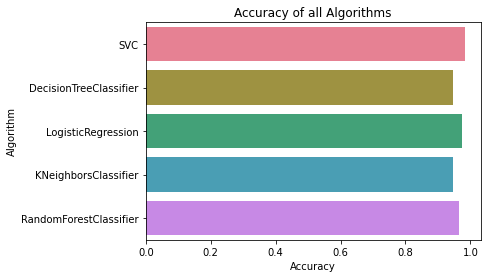

In [ ]:
# plotting the accuracy comparison:
sns.barplot(data_frame['Accuracy'],data_frame['Algorithm'],palette= "husl").set_title('Accuracy of all Algorithms')

Talking about accuracy leads us to the confusion matrix

We understand the number of:
- True positive 
- True negative 
- False positive 
- False negative

In [ ]:
# creating confusion matrix:

from sklearn.metrics import confusion_matrix

cm = np.array(confusion_matrix(y_test, y_pred_svc, labels=['M','B']))

confusion_mat= pd.DataFrame(cm, index = ['cancer', 'healthy'],
                           columns =['predicted_cancer','predicted_healthy'])

confusion_mat

,predicted_cancer,predicted_healthy
cancer,41,2
healthy,0,71


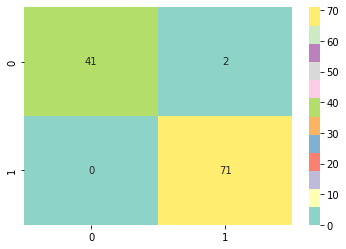

In [ ]:
sns.heatmap(cm,annot=True,fmt='g',cmap='Set3')

# Conclusion:

Thus, the comparison between multiple methods such as SVM, Decision Tree, Logistic Regression, KNN and Random Forest Classifier, we conclude that using SVM for the prediction of breast cancer seems to be promising with an accuracy of around 98%. It was followed by Logistic Regression with an accuracy of around 97%.